<a href="https://colab.research.google.com/github/kiwindow/telakoya/blob/main/Telakoya2_InputOutputPreprocess7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ■ 日本腎・血液浄化AI学会主催「よくわかる寺子屋セミナー」

# 第2回「データの入出力と前処理」　演習プログラム

## □ 文責　学術委員会副委員長　岩藤和広

◇ 以下の演習では、このnotebookをGoogle Colaboratoryを利用できる必要があります。Telakoya第１回の講義を参照して下さい。

https://www.dropbox.com/s/tr3hpa46hq7thvp/HowtoUseGoogleColaboratory.pdf?dl=0

◆ 以下のプログラムを変更為しに利用するには、以下の作業が必要になります。


*   Google Drive にある「マイドライプ」というフォルダーの中に Telakoya というフォルダーを作成す
る。
*  さらに、Telakoya の中に、data というフォルダーと result というフォルダーを作成する。
*  今使っている notebook を Telakoya というフォルダーの中に保存する。
* また data というフォルダーの中に以下の六つのデータをuploadして保存する。

　　　　data.csv, 　data.xlsx, 　dataM.xlsx, 　columndata.csv, 　columndata.xls, 　columndataM.xlsx

* 上記の六つのファイルは以下のリンクからdownloadできる。

　　　　　https://www.dropbox.com/s/nmpw7pt073aa9f5/Telakoya2Data.zip?dl=0

* データをuploadするには、Colaborary上でフォルダーdataに入り、新規 > ファイルのアップロードから uploadする 


# 1. データの入力 (読み込み)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd

## 1) csvファイルの読み込み

◆ データをcsvで保存する場合は、必ず「コンマ区切り」にする。

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
# pandasによるcsvファイルの読み込み
df_c = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
df_c.shape

(15000, 151)

In [ ]:
df_c.head()
# NaNとは、not a numberという意味で、欠損値を示す。

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


◆　 pd.read_csvでエラーが出る時
1. notebookがGoogle Driveにマウントされていない。(データはGoogle Drive上のデータを読み込むため)
2. ファイルのパス(directory)の記載にタイプミスがある。　☜　最も多い
3. パスの指定が 'drive/MyDrive/... で始まっていない。

## 2) Excelファイルの読み込み

### A. シートが一つの時

In [ ]:
# openpyxlとxlrdの読み込み
!pip install openpyxl
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

In [ ]:
# Excelの最初のsheetのみを読み込む時 (46sec)
df_e = pd.read_excel('drive/MyDrive/Telakoya/data/data.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
df_e.shape

(15000, 151)

In [ ]:
df_e.tail()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
14995,ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
14996,ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
14997,ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
14998,ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN
14999,ID15000,Z,3.843689,2.510889,A,0.399757,B,1.232519,1.876001,C,...,A,C,A,C,0.400730,4.093127,NaN,NaN,A,NaN


### B. シートが複数の時

◆ 一つのシートの読み込み

In [ ]:
# sheet_name どのシートを読み込みかを指定。　 (32sec)
# 特定のシートを読み込む時は、0, 1, 2, 3, ...　で指定する。(最初のシートを 0 から数える)
df_e2 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = 1 )

In [ ]:
df_e2.head()

,ID,factor151,factor152,factor153,factor154,factor155,factor156,factor157,factor158,factor159,...,factor291,factor292,factor293,factor294,factor295,factor296,factor297,factor298,factor299,factor300
0,ID1,NaN,2.464942,NaN,0.007436,Z,3.506274,1.314082,0.247916,1.021672,...,NaN,Z,Z,C,Z,4.869429,NaN,C,4.899439,2.568069
1,ID2,2.401100,0.515284,0.043880,NaN,NaN,1.395273,2.494737,3.660393,1.913122,...,NaN,Z,Z,C,C,2.067848,0.693057,A,0.793015,0.828566
2,ID3,NaN,3.317927,4.119144,3.199708,C,NaN,NaN,4.308041,NaN,...,C,NaN,B,NaN,Z,0.725646,0.462849,C,1.434779,4.021405
3,ID4,4.724536,0.434173,4.969515,0.461601,C,2.382994,2.021569,4.616026,3.155488,...,C,B,B,A,A,3.223171,4.310015,C,1.974843,4.641641
4,ID5,1.267560,0.460766,1.082705,0.783792,A,4.086288,4.849491,NaN,0.330423,...,A,A,B,C,B,3.327713,NaN,B,1.977426,0.375360


In [ ]:
# シートの名前 Sheet1, Sheet2, ... を sheet_name で指定してもよい (30sec)
df_e1 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = 'Sheet1')

In [ ]:
# シート1枚の時のデータのタイプ
type(df_e1)

pandas.core.frame.DataFrame

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.keys.html

In [ ]:
# シートの項目名の確認
df_e1.keys()

Index(['ID', 'factor1', 'factor2', 'factor3', 'factor4', 'factor5', 'factor6',
       'factor7', 'factor8', 'factor9',
       ...
       'factor141', 'factor142', 'factor143', 'factor144', 'factor145',
       'factor146', 'factor147', 'factor148', 'factor149', 'factor150'],
      dtype='object', length=151)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
# 使用したメモリー容量の確認
df_e1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 17.3+ MB


In [ ]:
# 使用したメモリー容量の確認 (17.2+ のように + の印が出る時)
df_e1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 66.1 MB


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [ ]:
# データの統計量の確認
df_e1.describe()

,factor2,factor3,factor5,factor7,factor8,factor10,factor11,factor13,factor16,factor17,...,factor128,factor132,factor133,factor134,factor137,factor138,factor139,factor145,factor146,factor147
count,12479.000000,12540.000000,12597.000000,12528.000000,12481.000000,12479.000000,12513.000000,12495.000000,12530.000000,12607.000000,...,12509.000000,12530.000000,12445.000000,12527.000000,12496.000000,12506.000000,12569.000000,12534.000000,12490.000000,12464.000000
mean,2.507555,2.492139,2.521674,2.504479,2.495181,2.523055,2.493290,2.502460,2.491179,2.484021,...,2.501165,2.491134,2.496794,2.509603,2.492250,2.491975,2.490179,2.507258,2.510838,2.500936
std,1.441746,1.444554,1.444790,1.445896,1.444372,1.451644,1.437224,1.439179,1.444730,1.448899,...,1.435519,1.428462,1.444519,1.441140,1.446791,1.435194,1.440081,1.448021,1.439993,1.440419
min,0.000281,0.000072,0.000484,0.001369,0.000731,0.000171,0.000025,0.000547,0.000596,0.000363,...,0.000304,0.000028,0.000558,0.000592,0.000061,0.000447,0.000158,0.000880,0.000058,0.000109
25%,1.247302,1.245538,1.280708,1.237048,1.246366,1.271320,1.255518,1.263326,1.231624,1.215359,...,1.271007,1.268657,1.246228,1.282643,1.243003,1.246883,1.247322,1.245831,1.269747,1.254364
50%,2.524384,2.493797,2.519669,2.517526,2.510490,2.527083,2.501047,2.498186,2.478844,2.487710,...,2.526900,2.488845,2.504620,2.518349,2.485182,2.503411,2.491443,2.512969,2.508644,2.512624
75%,3.763923,3.748452,3.785665,3.765544,3.746220,3.789381,3.746705,3.743419,3.740739,3.744319,...,3.731049,3.706626,3.743284,3.753403,3.751545,3.729997,3.730881,3.750641,3.763160,3.722054
max,4.999900,4.999275,4.999640,4.998896,4.999958,4.999664,4.999762,4.999801,4.999853,4.999918,...,4.999968,4.998888,4.999025,4.999945,4.999732,4.999664,4.999552,4.999864,4.999947,4.999758


◆ 複数のシートを読み込み

In [ ]:
# 複数のシートを読み込む時は、sheet_name = [0, 1, 4] または sheet_name = [0, 1. 'Sheet4'] などとする (1min)
df_e124 = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = [0, 1, "Sheet4"])

In [ ]:
# 複数のシートを読み込んだ場合のデータのタイプ
type(df_e124)

dict

◆ 辞書形式

dict = { 'height' : 173, 'weight' : 63, 'age' : 60 } 

'key' : value の組合せ

In [ ]:
len(df_e124)

3

In [ ]:
# 全てのシートを読み込み時は、sheet_name = Noneとする (1min)
df_eall = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = None)

In [ ]:
len(df_eall)

4

In [ ]:
# 各シートの名称の確認
df_eall.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 全てのシートのメモリー容量の確認
import io
keys = ['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4']
bag = []
for i in range(len(df_eall)):
    sheet = df_eall[keys[i]]
    buffer = io.StringIO()
    info = sheet.info(buf = buffer, memory_usage='deep', verbose=False)
    s = buffer.getvalue()
    n = s.find('memory')
    print('Sheet ' + str(i+1) + ' : ' + s[n:-1])
    count = s[-9:-4]
    bag.append(float(count))
sm = 0
for e in bag:
    sm += e
print('Total Memory ' + str(sm) + ' MB')

Sheet 1 : memory usage: 66.1 MB
Sheet 2 : memory usage: 66.1 MB
Sheet 3 : memory usage: 66.1 MB
Sheet 4 : memory usage: 66.1 MB
Total Memory 264.4 MB


In [ ]:
# 読み込んだ複数のシートから特定のシートを取り出す時
sheet3 = df_eall['Sheet3']
sheet3.head()

,ID,factor301,factor302,factor303,factor304,factor305,factor306,factor307,factor308,factor309,...,factor441,factor442,factor443,factor444,factor445,factor446,factor447,factor448,factor449,factor450
0,ID1,1.637469,B,4.807016,NaN,0.362068,C,NaN,1.024884,3.598801,...,Z,NaN,0.431421,2.354051,C,NaN,4.173442,0.530844,NaN,Z
1,ID2,3.004798,Z,1.255367,4.240366,3.098796,C,4.478978,1.139137,0.048258,...,B,B,0.361225,0.854408,C,NaN,3.772249,4.608696,NaN,A
2,ID3,NaN,Z,0.188772,4.443684,3.055271,C,3.386638,1.136162,3.216752,...,Z,Z,2.590638,3.064684,C,NaN,3.356388,3.076952,NaN,C
3,ID4,0.340177,A,2.413153,4.317032,1.846049,NaN,3.579710,NaN,3.838091,...,NaN,C,1.507554,NaN,B,4.662539,3.084195,4.518717,4.317032,NaN
4,ID5,1.965152,A,NaN,2.377202,4.765937,B,NaN,4.897822,4.978828,...,Z,B,2.987345,2.895044,A,NaN,NaN,3.547397,0.227089,C


# 2. データの出力 (保存、書き出し)

## 0) 使用するデータ

In [ ]:
import numpy as np
import pandas as pd

# pandasによるcsvファイルの読み込み 
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
df.shape

(15000, 151)

In [ ]:
df

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,NaN,2.824001,...,0.779132,0.491730,NaN,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 1) csvによる出力

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
# csv (to_csv)
df.to_csv('drive/MyDrive/Telakoya/data/df.csv')

In [ ]:
# csvからの読み込み (read_csv)
sheet = pd.read_csv('drive/MyDrive/Telakoya/data/df.csv')

In [ ]:
sheet.shape

(15000, 152)

In [ ]:
sheet.head()

,Unnamed: 0,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,2,ID3,A,A,C,3.175930,C,4.365006,A,C,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


In [ ]:
# 保存する際にindexを消す場合
df.to_csv('drive/MyDrive/Telakoya/data/df2.csv', index=False)

In [ ]:
sheet2 = pd.read_csv('drive/MyDrive/Telakoya/data/df2.csv')
sheet2.head()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN


In [ ]:
sheet2.shape

(15000, 151)

## 2) csvに圧縮して出力

In [ ]:
# 圧縮してcsvで保存 (compression = 'gzip')
df.to_csv('drive/MyDrive/Telakoya/data/dfcomp.csv.gz', compression = 'gzip')

In [ ]:
# 圧縮したcsvの読み込み (read_csv)
sheet_comp = pd.read_csv('drive/MyDrive/Telakoya/data/dfcomp.csv.gz')

In [ ]:
sheet_comp.equals(sheet)

True

In [ ]:
# メモリー容量の確認
sheet_comp.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 152 entries, Unnamed: 0 to factor150
dtypes: float64(75), int64(1), object(76)
memory usage: 66.2 MB


## 3) Parquetによる出力

In [ ]:
# Parquetのインストール
!pip install fastparquet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/pandas-docs/version/1.1/reference/api/pandas.DataFrame.to_parquet.html

In [ ]:
# Parquetで保存: to_parquet
df.to_parquet('drive/MyDrive/Telakoya/data/df.parquet')

https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [ ]:
# Parquetで読み込み: read_parquet
df_parquet = pd.read_parquet('drive/MyDrive/Telakoya/data/df.parquet')
df_parquet

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,None,None,A,NaN,None,1.241863,B,None,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,None,0.464134,Z,2.191147,None,B,4.382401,...,3.137875,4.642228,None,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,None,2.197228,None,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,None,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,None,2.824001,...,0.779132,0.491730,None,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,None,None,Z,NaN,A,4.059424,None,None,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


In [ ]:
df_parquet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 151 entries, ID to factor150
dtypes: float64(75), object(76)
memory usage: 64.4 MB


## 4) Featherによる出力

In [ ]:
# Featherのインストール
!pip install feather-format

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_feather.html

In [ ]:
# Featherによる保存
import feather
df.to_feather('drive/MyDrive/Telakoya/data/df.feather')

https://pandas.pydata.org/docs/reference/api/pandas.read_feather.html

In [ ]:
# Featherによる読み込み
df_feather = pd.read_feather('drive/MyDrive/Telakoya/data/df.feather')
df_feather

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,None,None,A,NaN,None,1.241863,B,None,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,None,0.464134,Z,2.191147,None,B,4.382401,...,3.137875,4.642228,None,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,None,2.197228,None,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,None,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,None,2.824001,...,0.779132,0.491730,None,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,None,None,Z,NaN,A,4.059424,None,None,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 5) Pickleによる出力

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_pickle.html

In [ ]:
# pickleによる保存
import pickle
df.to_pickle('drive/MyDrive/Telakoya/data/df.pkl')

https://pandas.pydata.org/docs/reference/api/pandas.read_pickle.html

In [ ]:
# pickleによる読み込み
df_pkl = pd.read_pickle('drive/MyDrive/Telakoya/data/df.pkl')
df_pkl

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,0.445390,C,NaN,2.824001,...,0.779132,0.491730,NaN,NaN,Z,2.614576,2.299104,2.843733,4.201130,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


# 3. 入出力の容量と時間の比較

### ランダムなデータの作成

In [ ]:
# row-orientedなデータ(matrixR)を作成する関数
import numpy as np
import pandas as pd
collen = 200000
rowlen = 100
matrixR = np.random.rand(collen, rowlen)
print(matrixR.shape)
matrixR = pd.DataFrame(matrixR)
heads = []
for i in range(rowlen):
    heads.append(str(i))
heads
matrixR.columns = heads

(200000, 100)


In [ ]:
# column-orientedなデータ(matrixC)を作成する関数
import numpy as np
import pandas as pd
collen = 100
rowlen = 200000
matrixC = np.random.rand(collen, rowlen)
print(matrixC.shape)
matrixC = pd.DataFrame(matrixC)
heads = []
for i in range(rowlen):
    heads.append('factor'+str(i))
heads
matrixC.columns = heads

(100, 200000)


### A. csvによる出力

In [ ]:
# 縦に長いデータ (33秒)
matrixR.to_csv('drive/MyDrive/Telakoya/data/matrixR.csv')

In [ ]:
# 横に長いデータ (1分)
matrixC.to_csv('drive/MyDrive/Telakoya/data/matrixC.csv')

### B. parquetによる出力

In [ ]:
!pip install fastparquet
# 縦に長いデータ
matrixR.to_parquet('drive/MyDrive/Telakoya/data/matrixR.parquet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 横に長いデータ (43秒)
matrixC.to_parquet('drive/MyDrive/Telakoya/data/matrixC.parquet')

### C. featherによる出力

In [ ]:
# 縦に長いデータ
!pip install feather-format
import feather
feather.write_dataframe(matrixR, 'drive/MyDrive/Telakoya/data/matrixR.feather')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 横に長いデータ (50秒)
feather.write_dataframe(matrixC, 'drive/MyDrive/Telakoya/data/matrixC.feather')

### D. pickleによる出力

In [ ]:
# 縦に長いデータ
import pickle
matrixR.to_pickle('drive/MyDrive/Telakoya/data/matrixR.pkl')

In [ ]:
# 横に長いデータ (1秒)
matrixC.to_pickle('drive/MyDrive/Telakoya/data/matrixC.pkl')

### E. 圧縮したcsvによる出力

In [ ]:
# 縦に長いデータ (2分)
matrixR.to_csv('drive/MyDrive/Telakoya/data/matrixRcomp.csv.gz', compression = 'gzip')

In [ ]:
# 横に長いデータ (2分)
matrixC.to_csv('drive/MyDrive/Telakoya/data/matrixCcomp.csv.gz', compression = 'gzip')

# 4. 前処理

◇　データの読み込み

In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd
import seaborn as sns

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
# データのタイプの確認
type(df)

pandas.core.frame.DataFrame

In [ ]:
# データの一部の表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,...,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,...,4.402666,1.707958,A,3.501586,A,3.749315,0.557002,1.101343,4.299159,0.938373
6,ID7,NaN,B,Z,2.162318,A,1.356833,C,A,4.691786,...,0.585652,4.417323,NaN,4.392648,NaN,1.702492,3.222163,0.563609,2.518862,4.205691
7,ID8,A,Z,Z,3.015889,B,NaN,NaN,C,4.719366,...,2.699121,NaN,B,2.297406,Z,4.995464,0.419017,2.372937,4.988565,2.585732
8,ID9,A,NaN,A,4.764512,A,NaN,Z,A,4.391872,...,0.591030,0.054777,B,4.285026,Z,4.880026,3.890645,NaN,NaN,1.708590
9,ID10,NaN,Z,B,3.524959,B,0.063331,A,C,4.310171,...,2.034784,2.164489,Z,NaN,C,1.727188,NaN,NaN,4.695228,2.686666


## 1) 外れ値の処理

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html

In [ ]:
# 実数や整数の列
numb = df.select_dtypes(include='number')
numb

,factor4,factor6,factor9,factor10,factor11,factor12,factor15,factor18,factor19,factor20,...,factor134,factor136,factor141,factor142,factor144,factor146,factor147,factor148,factor149,factor150
0,NaN,1.241863,0.984801,2.469171,1.822291,4.038186,NaN,0.903868,2.857458,NaN,...,3.276990,2.857458,1.369706,3.965898,3.511195,NaN,4.951736,1.259221,0.773287,1.028736
1,0.283582,0.243880,2.599852,NaN,4.699768,NaN,3.202971,3.237537,4.165371,1.600499,...,1.052759,4.587573,3.351286,1.501172,1.029643,4.022659,1.036468,0.221097,0.976044,2.983533
2,3.175930,4.365006,1.650896,4.186858,2.469081,3.232988,3.896583,2.101856,1.216347,4.095216,...,3.175933,4.520745,3.175930,4.225075,1.944667,0.651723,4.186858,NaN,2.434897,4.520745
3,1.566577,2.983811,NaN,0.149180,2.524717,4.578371,2.104916,4.861378,3.919013,2.176116,...,2.105304,2.689592,4.724513,2.689592,1.428877,1.286300,NaN,4.652309,1.428877,3.362870
4,0.464134,2.191147,4.382401,1.090004,NaN,0.082078,0.531067,1.386880,0.555321,0.359465,...,4.852692,0.724870,3.137875,4.642228,4.684253,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.197228,4.384694,NaN,4.738641,2.019546,2.046802,NaN,0.815618,NaN,4.470470,...,1.902927,3.092832,2.588611,2.877683,4.781191,0.224341,0.143134,2.340001,0.224341,4.952754
14996,4.077054,0.445390,2.824001,3.497963,NaN,3.049475,1.467747,3.973854,1.423126,2.824001,...,3.049475,2.299104,0.779132,0.491730,NaN,2.614576,2.299104,2.843733,4.201130,0.097627
14997,1.407224,2.360011,2.511333,4.765450,NaN,2.685202,3.279118,2.940761,0.893560,1.414986,...,1.094837,1.964906,2.044176,2.511333,3.706377,NaN,1.562139,4.859076,4.932989,0.391659
14998,NaN,4.059424,2.878456,2.880888,0.677698,NaN,1.289831,4.666555,NaN,2.177858,...,2.645302,NaN,NaN,4.732487,NaN,4.666555,2.699051,1.314517,2.407777,2.731233


In [ ]:
numb.columns

Index(['factor4', 'factor6', 'factor9', 'factor10', 'factor11', 'factor12',
       'factor15', 'factor18', 'factor19', 'factor20', 'factor25', 'factor26',
       'factor29', 'factor31', 'factor32', 'factor33', 'factor35', 'factor38',
       'factor41', 'factor43', 'factor45', 'factor46', 'factor47', 'factor49',
       'factor51', 'factor53', 'factor55', 'factor58', 'factor59', 'factor61',
       'factor62', 'factor65', 'factor66', 'factor67', 'factor68', 'factor69',
       'factor72', 'factor73', 'factor76', 'factor77', 'factor79', 'factor81',
       'factor83', 'factor92', 'factor94', 'factor97', 'factor99', 'factor101',
       'factor102', 'factor103', 'factor105', 'factor106', 'factor107',
       'factor110', 'factor111', 'factor117', 'factor121', 'factor122',
       'factor124', 'factor126', 'factor127', 'factor128', 'factor129',
       'factor130', 'factor132', 'factor134', 'factor136', 'factor141',
       'factor142', 'factor144', 'factor146', 'factor147', 'factor148',
       'fa

In [ ]:
# 文字の列
string = df.select_dtypes(include='object')
string

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


In [ ]:
string.columns

Index(['ID', 'factor1', 'factor2', 'factor3', 'factor5', 'factor7', 'factor8',
       'factor13', 'factor14', 'factor16', 'factor17', 'factor21', 'factor22',
       'factor23', 'factor24', 'factor27', 'factor28', 'factor30', 'factor34',
       'factor36', 'factor37', 'factor39', 'factor40', 'factor42', 'factor44',
       'factor48', 'factor50', 'factor52', 'factor54', 'factor56', 'factor57',
       'factor60', 'factor63', 'factor64', 'factor70', 'factor71', 'factor74',
       'factor75', 'factor78', 'factor80', 'factor82', 'factor84', 'factor85',
       'factor86', 'factor87', 'factor88', 'factor89', 'factor90', 'factor91',
       'factor93', 'factor95', 'factor96', 'factor98', 'factor100',
       'factor104', 'factor108', 'factor109', 'factor112', 'factor113',
       'factor114', 'factor115', 'factor116', 'factor118', 'factor119',
       'factor120', 'factor123', 'factor125', 'factor131', 'factor133',
       'factor135', 'factor137', 'factor138', 'factor139', 'factor140',
       'fact

In [ ]:
# 最小値、最大値とデータの分布を表示する関数
def minmax(list, n):
    import seaborn as sns
    vec = list.iloc[:, n]
    realvec = vec.dropna()
    print('               ')
    print('◆　最小値と最大値')
    print('min: ' + str(min(realvec)) + ',  max: ' + str(max(realvec)))
    print('               ')
    print('◆ データの分布')
    sns.histplot(realvec)

               
◆　最小値と最大値
min: 1.9107152748887304e-07,  max: 4.999860584223574
               
◆ データの分布


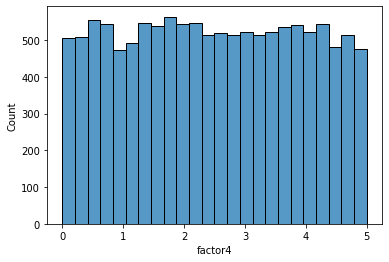

In [ ]:
# pandasのDataFrameであるdfの5列目の最小値、最大値と分布
minmax(df, 4)

◇　Pandasの行や列を取り出すメサッド iloc

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html

In [ ]:
# 最小値以下の値と最大値以上の値を除去する関数
def removeoutliner(list, column, min, max):
    dim = list.shape
    print('        ')
    print('◆ 入力データの次元 {}行 × {}列'.format(dim[0], dim[1]))
    print('        ')    
    print('◇ Outlinerを除去する列: {}'.format(column))
    print('　　　　　Outlinerの下限: {}  上限:  {}'.format(min, max))
    print('        ')        
    vec = list.iloc[:, column]
    leng = len(vec)
    newvec = []
    count = 0
    for i in range(leng):
        if vec[i] == 'NaN':
            newvec.append('NaN')
        elif vec[i] < min:
            count += 1
            newvec.append('NaN')
        elif vec[i] > max:
            count += 1
            newvec.append('NaN')
        else:
            newvec.append(vec[i])
    print('□ 削除した要素の数: {}'.format(count))
    print('                    ')
    pre = np.array(list.iloc[:, :column])
    newvec = np.array([newvec]).T
    post = np.array(list.iloc[:, column+1:])
    newlist = np.concatenate([pre, newvec, post], axis=1)
    return pd.DataFrame(newlist)

In [ ]:
# pandasのDataFrameであるdfの5列目で、1より小さいか 4より大きい値を NaN (not a number)とする
res = removeoutliner(df, 4, 1, 4)
res

        
◆ 入力データの次元 15000行 × 151列
        
◇ Outlinerを除去する列: 4
　　　　　Outlinerの下限: 1  上限:  4
        
□ 削除した要素の数: 4926
                    


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,ID1,NaN,NaN,A,nan,NaN,1.241863,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,NaN,A,0.24388,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.1759301262928386,C,4.365006,A,C,1.650896,...,3.17593,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.5665770940300918,A,2.983811,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.2863,NaN,4.652309,1.428877,3.36287
4,ID5,C,Z,NaN,NaN,Z,2.191147,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.1972279440506792,NaN,4.384694,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,NaN,Z,0.44539,C,NaN,2.824001,...,0.779132,0.49173,NaN,NaN,Z,2.614576,2.299104,2.843733,4.20113,0.097627
14997,ID14998,A,C,Z,1.4072236625307877,B,2.360011,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,nan,A,4.059424,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


               
◆　最小値と最大値
min: 0.0008651517866962,  max: 4.999756747531086
               
◆ データの分布


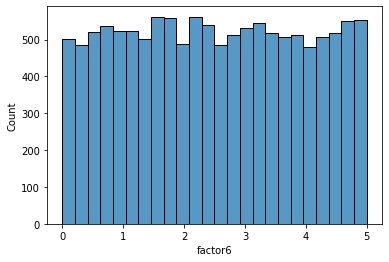

In [ ]:
# pandasのDataFrameであるdfの7列目の最小値、最大値と分布
minmax(df, 6)

In [ ]:
# pandasのDataFrameであるdfの7列目で、1より小さいか 4より大きい値を NaN (not a number)とする
removeoutliner(df, 6, 1, 4)

        
◆ 入力データの次元 15000行 × 151列
        
◇ Outlinerを除去する列: 6
　　　　　Outlinerの下限: 1  上限:  4
        
□ 削除した要素の数: 4968
                    


,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863450303276,B,NaN,0.984801,...,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,NaN,Z,A,2.599852,...,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.17593,C,NaN,A,C,1.650896,...,3.17593,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.9838108655508204,C,Z,NaN,...,4.724513,2.689592,B,1.428877,C,1.2863,NaN,4.652309,1.428877,3.36287
4,ID5,C,Z,NaN,0.464134,Z,2.191146688612797,NaN,B,4.382401,...,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,2.197228,NaN,NaN,C,A,NaN,...,2.588611,2.877683,B,4.781191,NaN,0.224341,0.143134,2.340001,0.224341,4.952754
14996,ID14997,A,C,A,4.077054,Z,NaN,C,NaN,2.824001,...,0.779132,0.49173,NaN,NaN,Z,2.614576,2.299104,2.843733,4.20113,0.097627
14997,ID14998,A,C,Z,1.407224,B,2.3600107658302534,B,A,2.511333,...,2.044176,2.511333,Z,3.706377,B,NaN,1.562139,4.859076,4.932989,0.391659
14998,ID14999,NaN,NaN,Z,NaN,A,NaN,NaN,NaN,2.878456,...,NaN,4.732487,B,NaN,B,4.666555,2.699051,1.314517,2.407777,2.731233


## 2) 欠損値の処理

◇ データの読み込み

In [4]:
# numpyとpandasのimport
import numpy as np
import pandas as pd
import seaborn as sns

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

### 欠損値の表示 (pd.isnull)

https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [5]:
# 欠損値の確認
df.isnull()

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,False,True,True,False,True,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,True,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
14998,False,True,True,False,True,False,False,True,True,False,...,True,False,False,True,False,False,False,False,False,False


◇ 表示できる行や列の数の変更 (pd.set_option)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#pandas.set_option

In [6]:
# 全ての行や列の結果を表示する場合
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

◇　行毎の欠損値の個数の表示 (pd.isnull)

In [7]:
# 欠損値の個数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
factor5      2937
factor6      2486
factor7      3035
factor8      2998
factor9      2489
factor10     2474
factor11     2500
factor12     2476
factor13     2944
factor14     3004
factor15     2535
factor16     2979
factor17     2886
factor18     2455
factor19     2494
factor20     2506
factor21     2978
factor22     2952
factor23     3082
factor24     2989
factor25     2511
factor26     2563
factor27     2944
factor28     3028
factor29     2496
factor30     3008
factor31     2471
factor32     2508
factor33     2513
factor34     2999
factor35     2570
factor36     2940
factor37     2953
factor38     2548
factor39     2988
factor40     2962
factor41     2512
factor42     2994
factor43     2526
factor44     3036
factor45     2518
factor46     2456
factor47     2526
factor48     3007
factor49     2467
factor50     2984
factor51     2428
factor52     3000
factor53     2525
factor54     2931
factor55  

In [8]:
# 結果を表示を制限する
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### A. 1列ずつ取り出し、平均値や中央値で補完する場合 (pd.fillna)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [9]:
# 第5列の取り出し
col4 = df.iloc[:, 4]
col4

0             NaN
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998         NaN
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [10]:
# データのタイプの確認
type(col4)

pandas.core.series.Series

In [11]:
#　平均値
mean = col4.mean()
mean

2.4880852839692182

In [12]:
# 中央値
median = col4.median()
median

2.4742918820579574

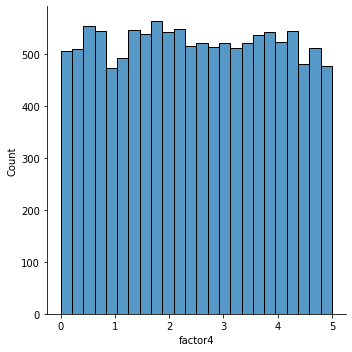

In [13]:
# 分布
sns.displot(col4)

In [14]:
# 欠損値を平均値で置き換え
col4av = col4.fillna(col4.mean())
col4av

0        2.488085
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998    2.488085
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [15]:
# 非数の個数の表示
col4av.isnull().sum()

0

In [16]:
# 欠損値を中央値で置き換え
col4m = col4.fillna(col4.median())
col4m

0        2.474292
1        0.283582
2        3.175930
3        1.566577
4        0.464134
           ...   
14995    2.197228
14996    4.077054
14997    1.407224
14998    2.474292
14999    4.072493
Name: factor4, Length: 15000, dtype: float64

In [17]:
# 非数の個数
col4m.isnull().sum()

0

In [18]:
# 【参考】　非数を取り除きたいとき
values = col4.dropna()
values

1        0.283582
2        3.175930
3        1.566577
4        0.464134
5        4.096361
           ...   
14993    3.265924
14995    2.197228
14996    4.077054
14997    1.407224
14999    4.072493
Name: factor4, Length: 12544, dtype: float64

### B. 複数の列を一度に補完する場合

In [19]:
# 各列毎の欠損値の個数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
             ... 
factor146    2470
factor147    2453
factor148    2490
factor149    2520
factor150    2599
Length: 151, dtype: int64

In [20]:
df.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,...,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,...,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,...,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,...,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,...,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,NaN,0.425597,3.137875,1.291661,A,3.812654,B,B,4.106080,A,A,3.920263,A,NaN,B,3.049662,NaN,2.247368,C,1.323142,...,3.988592,4.676956,NaN,B,0.639870,0.588442,4.106080,B,B,2.190314,3.920263,C,Z,B,NaN,B,3.846921,Z,NaN,B,4.106080,3.081656,B,0.716344,NaN,0.700881,1.815253,3.137875,4.283668,3.739876,A,4.684253,Z,4.852692,Z,0.724870,Z,A,Z,A,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,NaN,4.096361,B,4.791550,NaN,NaN,1.788982,C,C,0.598016,NaN,1.853560,B,0.938373,1.928875,4.299159,B,2.60121

In [21]:
# factor4は平均値で、factor6は中央値で補完する場合
dfcomp = df.fillna( { 'factor4' : df['factor4'].mean(),  'factor6' : df['factor6'].median() } )

In [22]:
dfcomp.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,...,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,2.488085,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,...,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,...,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,...,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,...,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,NaN,0.425597,3.137875,1.291661,A,3.812654,B,B,4.106080,A,A,3.920263,A,NaN,B,3.049662,NaN,2.247368,C,1.323142,...,3.988592,4.676956,NaN,B,0.639870,0.588442,4.106080,B,B,2.190314,3.920263,C,Z,B,NaN,B,3.846921,Z,NaN,B,4.106080,3.081656,B,0.716344,NaN,0.700881,1.815253,3.137875,4.283668,3.739876,A,4.684253,Z,4.852692,Z,0.724870,Z,A,Z,A,3.137875,4.642228,NaN,4.684253,Z,0.708323,0.808047,0.581696,4.782386,NaN
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,NaN,4.096361,B,4.791550,NaN,NaN,1.788982,C,C,0.598016,NaN,1.853560,B,0.938373,1.928875,4.299159,B,2.

### C. 欠損値の多い行や列を全て削除する場合 (pd.drop)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [ ]:
# 内容のの表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

In [ ]:
# fator4の列を列ごと削除する
dfdrop = df.drop('factor4', axis = 1)

In [ ]:
dfdrop.head()

,ID,factor1,factor2,factor3,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,

In [ ]:
# 各行毎の欠損数を表示する
df.T.isnull().sum()

0        32
1        36
2        29
3        26
4        23
         ..
14995    27
14996    31
14997    23
14998    28
14999    31
Length: 15000, dtype: int64

In [ ]:
#　1行目と５行目を削除する場合
dfremove = df.drop([0, 4])
dfremove.head(10)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,B,4.987059,Z,3.726332,B,3.411700,B,B,1.352076,2.690932,Z,1.876773,1.059391,B,A,4.601694,4.318651,3.127091,NaN,2.284618,A,B,0.834846,3.275162,A,A,4.306125,4.887632,NaN,NaN,NaN,4.438206,A,2.694831,Z,Z,A,NaN,C,C,NaN,Z,2.058104,A,NaN,C,NaN,4.861093,NaN,2.284618,Z,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
5,ID6,Z,Z,Z,4.096361,A,1.549590,NaN,B,2.339750,NaN,4.614283,4.850956,B,B,3.821429,C,C,1.096352,2.922712,3.066038,Z,B,A,NaN,NaN,1.565455,NaN,NaN,NaN,B,2.906034,N

### D. 欠損値のある行や列を削除する場合 (pd.dropna)

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [ ]:
# 内容のの表示
df.head(20)

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

In [ ]:
# 少なくとも一つの欠損値を持つ全ての行を削除する場合
dfremoveall = df.dropna()
dfremoveall
# この場合、欠損値のないレコードはないため、すべてのレコードが削除される

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150


In [ ]:
# 少なくとも一つの欠損値が factor4 にある行を削除する場合 (axisは指定しなくてもdefaultでaxis=0となっている)
dfremovepart = df.dropna(subset = ['factor4'])
dfremovepart

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,NaN,Z,NaN,4.210658,3.370492,NaN,NaN,Z,Z,4.250946,A,NaN,3.245829,A,0.149180,A,1.519796,2.105304,NaN,B,NaN,B,4.987059,Z,3.726332,B,3.411700,B,B,1.352076,2.690932,Z,1.876773,1.059391,B,A,4.601694,4.318651,3.127091,NaN,2.284618,A,B,0.834846,3.275162,A,A,4.306125,4.887632,NaN,NaN,NaN,4.438206,A,2.694831,Z,Z,A,NaN,C,C,NaN,Z,2.058104,A,NaN,C,NaN,4.861093,NaN,2.284618,Z,2.968861,2.689592,3.368035,C,3.209772,4.702451,2.694831,A,C,3.726332,1.131638,Z,B,B,A,A,0.087589,Z,NaN,Z,3.512753,0.699263,C,NaN,Z,4.242569,4.446314,1.428877,2.657416,NaN,NaN,3.284032,Z,2.105304,Z,2.689592,A,NaN,B,B,4.724513,2.689592,B,1.428877,C,1.286300,NaN,4.652309,1.428877,3.362870
4,ID5,C,Z,NaN,0.464134,Z,2.191147,NaN,B,4.382401,1.090004,NaN,0.082078,A,C,0.531067,B,B,1.386880,0.555321,0.359465,Z,NaN,NaN,C,0.761360,0.437505,NaN,A,4.072889,

In [ ]:
# 各列毎の欠損数の表示
df.isnull().sum()

ID              0
factor1      2985
factor2      3053
factor3      3057
factor4      2456
             ... 
factor146    2470
factor147    2453
factor148    2490
factor149    2520
factor150    2599
Length: 151, dtype: int64

In [ ]:
# 欠損値でない値が12,500以上の列を残す (欠損値が2,500未満の列を残す)
droploss = df.dropna(thresh=12500, axis=1)
droploss

,ID,factor4,factor6,factor9,factor10,factor11,factor12,factor18,factor19,factor29,factor31,factor46,factor49,factor51,factor55,factor65,factor66,factor67,factor83,factor102,factor103,factor106,factor107,factor110,factor117,factor121,factor134,factor142,factor146,factor147,factor148
0,ID1,NaN,1.241863,0.984801,2.469171,1.822291,4.038186,0.903868,2.857458,4.984307,0.001616,2.121655,2.513464,2.295458,1.260032,NaN,1.623454,1.964873,3.100741,1.112267,3.381201,3.858405,4.801806,0.444077,1.260355,3.758708,3.276990,3.965898,NaN,4.951736,1.259221
1,ID2,0.283582,0.243880,2.599852,NaN,4.699768,NaN,3.237537,4.165371,NaN,0.295752,2.934470,2.450915,2.850523,3.715993,0.813558,2.934470,0.976044,2.291703,3.870807,4.863287,1.739113,4.590584,4.342024,3.098601,2.364969,1.052759,1.501172,4.022659,1.036468,0.221097
2,ID3,3.175930,4.365006,1.650896,4.186858,2.469081,3.232988,2.101856,1.216347,4.808219,0.910761,NaN,3.631673,NaN,4.186858,4.425289,2.434897,NaN,1.083943,2.549740,3.896583,NaN,4.931812,0.075712,1.941972,1.543956,3.175933,4.225075,0.651723,4.186858,NaN
3,ID4,1.566577,2.983811,NaN,0.149180,2.524717,4.578371,4.861378,3.919013,NaN,NaN,2.105304,NaN,4.987059,3.411700,4.601694,4.318651,3.127091,2.694831,2.689592,3.368035,4.702451,2.694831,3.726332,0.087589,3.512753,2.105304,2.689592,1.286300,NaN,4.652309
4,ID5,0.464134,2.191147,4.382401,1.090004,NaN,0.082078,1.386880,0.555321,4.072889,0.425597,NaN,1.323142,3.807364,3.807364,0.464134,0.555321,3.321233,0.483867,4.676956,NaN,0.588442,4.106080,2.190314,3.846921,4.106080,4.852692,4.642228,0.708323,0.808047,0.581696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,2.197228,4.384694,NaN,4.738641,2.019546,2.046802,0.815618,NaN,1.848568,NaN,3.835551,3.367056,0.143134,NaN,NaN,3.216287,2.427298,3.367056,2.197228,3.462115,NaN,3.908579,4.925876,3.719722,2.588611,1.902927,2.877683,0.224341,0.143134,2.340001
14996,ID14997,4.077054,0.445390,2.824001,3.497963,NaN,3.049475,3.973854,1.423126,4.551346,2.086606,0.390986,NaN,1.550577,0.018289,1.062223,NaN,0.779132,2.614576,3.049475,3.850616,0.332232,2.271194,2.966605,4.911405,2.749235,3.049475,0.491730,2.614576,2.299104,2.843733
14997,ID14998,1.407224,2.360011,2.511333,4.765450,NaN,2.685202,2.940761,0.893560,1.635755,3.239032,2.822728,2.393820,2.918072,NaN,0.770691,2.469749,2.050180,2.913268,4.739103,0.463616,1.775575,3.060938,NaN,2.454056,4.984215,1.094837,2.511333,NaN,1.562139,4.859076
14998,ID14999,NaN,4.059424,2.878456,2.880888,0.677698,NaN,4.666555,NaN,3.175944,4.666555,0.632858,0.677698,4.010128,2.876433,4.593942,0.193589,3.397636,NaN,4.059424,4.444863,0.101104,2.228709,3.793903,1.130751,2.540646,2.645302,4.732487,4.666555,2.699051,1.314517


### E. 任意の配列の n 列を中央値で置き換える

In [ ]:
# pandasの配列 list の n 列を中央値で置き換える関数 (列の番号は 0 から数える　　　n = 0, 1, 2, ...)
def interploate(list, n):
    # listはpandasのDateFrame, n列は数値が入力された列
    import pandas as pd
    col = list.iloc[:, n]
    col2 = pd.DataFrame(col.fillna(col.median()))
    pre = list.iloc[:, :n]
    post = list.iloc[:, n+1:]
    newlist = pd.concat([pre, col2, post], axis=1)
    return newlist

In [ ]:
res = interploate(df, 4)
res

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,2.474292,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,

In [ ]:
res.iloc[:, 4].isnull().sum()

0

## 3) カテゴリカル変数のEncoding

◇ データの読み込み

In [ ]:
# numpyとpandasのimport
import numpy as np
import pandas as pd

# pandasによるcsvファイルの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

### A. One-Hot Encoding

ある列が、例えば、A, B, C, Z　という文字で入力されている場合、それぞれの文字一つに対して新しい列を一つ作り、各列において、例えば A が入力されていれば 1、それ以外は 0 とする。

In [ ]:
# データの表示
df

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13,factor14,factor15,factor16,factor17,factor18,factor19,factor20,factor21,factor22,factor23,factor24,factor25,factor26,factor27,factor28,factor29,factor30,factor31,factor32,factor33,factor34,factor35,factor36,factor37,factor38,factor39,factor40,factor41,factor42,factor43,factor44,factor45,factor46,factor47,factor48,factor49,factor50,factor51,factor52,factor53,factor54,factor55,factor56,factor57,factor58,factor59,factor60,factor61,factor62,factor63,factor64,factor65,factor66,factor67,factor68,factor69,factor70,factor71,factor72,factor73,factor74,factor75,factor76,factor77,factor78,factor79,factor80,factor81,factor82,factor83,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor92,factor93,factor94,factor95,factor96,factor97,factor98,factor99,factor100,factor101,factor102,factor103,factor104,factor105,factor106,factor107,factor108,factor109,factor110,factor111,factor112,factor113,factor114,factor115,factor116,factor117,factor118,factor119,factor120,factor121,factor122,factor123,factor124,factor125,factor126,factor127,factor128,factor129,factor130,factor131,factor132,factor133,factor134,factor135,factor136,factor137,factor138,factor139,factor140,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,NaN,NaN,A,NaN,NaN,1.241863,B,NaN,0.984801,2.469171,1.822291,4.038186,Z,NaN,NaN,Z,NaN,0.903868,2.857458,NaN,C,B,Z,A,NaN,4.375062,A,Z,4.984307,A,0.001616,1.734953,1.440912,A,4.735821,C,A,1.606482,Z,C,1.388363,NaN,0.702898,A,1.717782,2.121655,1.644437,A,2.513464,C,2.295458,B,4.732243,NaN,1.260032,A,Z,NaN,4.855894,NaN,4.819013,3.343832,A,C,NaN,1.623454,1.964873,4.465262,3.292054,B,B,NaN,0.673938,C,Z,1.112267,0.855364,NaN,1.549669,Z,4.038186,B,3.100741,NaN,A,A,NaN,A,A,B,A,NaN,NaN,4.038186,NaN,A,3.575031,C,NaN,Z,3.151808,1.112267,3.381201,A,2.999647,3.858405,4.801806,C,Z,0.444077,0.678439,Z,NaN,C,B,NaN,1.260355,B,C,NaN,3.758708,4.560606,Z,NaN,C,2.851758,NaN,2.857458,2.295458,3.381201,NaN,2.618768,Z,3.276990,NaN,2.857458,A,C,NaN,B,1.369706,3.965898,C,3.511195,A,NaN,4.951736,1.259221,0.773287,1.028736
1,ID2,C,Z,Z,0.283582,A,0.243880,Z,A,2.599852,NaN,4.699768,NaN,NaN,NaN,3.202971,NaN,A,3.237537,4.165371,1.600499,NaN,NaN,B,Z,NaN,4.960150,Z,NaN,NaN,Z,0.295752,4.143363,0.976044,Z,2.347257,NaN,Z,4.590584,NaN,Z,NaN,NaN,3.098601,B,2.207037,2.934470,1.600499,NaN,2.450915,A,2.850523,NaN,4.262633,A,3.715993,Z,NaN,4.342024,0.318102,C,1.472545,4.446956,B,B,0.813558,2.934470,0.976044,2.522492,2.026953,NaN,B,4.312490,NaN,NaN,B,0.283582,NaN,NaN,1.301660,A,0.498665,A,2.291703,B,Z,C,B,A,B,NaN,A,4.192162,A,NaN,A,B,3.951801,A,3.870807,NaN,3.130223,3.870807,4.863287,A,4.312490,1.739113,4.590584,A,NaN,4.342024,NaN,NaN,NaN,NaN,NaN,Z,3.098601,Z,A,Z,2.364969,1.501172,NaN,3.005129,NaN,1.049021,1.525243,1.501172,NaN,4.262633,C,4.464501,A,1.052759,C,4.587573,Z,C,NaN,NaN,3.351286,1.501172,Z,1.029643,A,4.022659,1.036468,0.221097,0.976044,2.983533
2,ID3,A,A,C,3.175930,C,4.365006,A,C,1.650896,4.186858,2.469081,3.232988,Z,B,3.896583,Z,B,2.101856,1.216347,4.095216,C,C,C,C,2.009028,2.928844,Z,A,4.808219,A,0.910761,4.186858,4.732603,B,3.602666,C,NaN,NaN,Z,NaN,3.112343,A,1.795436,C,NaN,NaN,NaN,C,3.631673,C,NaN,C,0.408177,C,4.186858,C,C,NaN,3.590980,A,4.337471,0.180309,C,C,4.425289,2.434897,NaN,0.878112,0.704351,B,NaN,3.306590,2.846939,C,NaN,2.434897,0.180309,A,2.747703,C,1.365625,A,1.083943,NaN,NaN,NaN,C,NaN,NaN,A,NaN,3.306590,B,3.232988,NaN,B,3.219071,NaN,3.477463,Z,3.477463,2.549740,3.896583,A,0.421385,NaN,4.931812,C,C,0.075712,2.888759,NaN,NaN,Z,A,NaN,1.941972,A,NaN,Z,1.543956,1.362242,C,3.054491,NaN,NaN,NaN,2.434897,1.795436,0.967157,NaN,1.588102,Z,3.175933,Z,4.520745,A,A,C,Z,3.175930,4.225075,C,1.944667,Z,0.651723,4.186858,NaN,2.434897,4.520745
3,ID4,A,Z,A,1.566577,A,2.983811,C,Z,NaN,0.149180,2.524717,4.578371,NaN,NaN,2.104916,C,C,4.861378,3.919013,2.176116,B,Z,NaN,Z,2.105304,2.620169,C,B,N

◇ factor1の列を、One-Hot Encodingしてみる。

In [ ]:
# カテゴリカルデータが入力された列の抽出
df_cat = df.select_dtypes(include='object')
df_cat

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


In [ ]:
# column名がfactor1の列の抽出
factor1 = df_cat.iloc[:, 1]
factor1

0        NaN
1          C
2          A
3          A
4          C
        ... 
14995      B
14996      A
14997      A
14998    NaN
14999      A
Name: factor1, Length: 15000, dtype: object

https://pandas.pydata.org/docs/reference/api/pandas.unique.html

In [ ]:
# factor1にどの様な文字があるかの確認
factor1.unique()

array([nan, 'C', 'A', 'Z', 'B'], dtype=object)

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [ ]:
# get_dummiesメサッドによる One Hot Encoding
factor1OH = pd.get_dummies(factor1)
factor1OH

,A,B,C,Z
0,0,0,0,0
1,0,0,1,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
14995,0,1,0,0
14996,1,0,0,0
14997,1,0,0,0
14998,0,0,0,0


In [ ]:
# IDの列の削除
df_cat2 = df_cat.iloc[:, 1:]

# 全ての列のOne Hot Encoding
df_catOH = pd.get_dummies(df_cat2)
df_catOH

,factor1_A,factor1_B,factor1_C,factor1_Z,factor2_A,factor2_B,factor2_C,factor2_Z,factor3_A,factor3_B,...,factor140_C,factor140_Z,factor143_A,factor143_B,factor143_C,factor143_Z,factor145_A,factor145_B,factor145_C,factor145_Z
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
14996,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
14997,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
# One Hot Encodingの結果を出力して確認へ
df_catOH.to_csv('drive/MyDrive/Telakoya/result/df_catOH.csv')
# これをdownloadして、自身のPC上で開く。

### B. Label Encodgin

文字が入力された列の一つ一つの文字に対し、A --> 0,  B --> 1, C --> 2, ... などと数字を当てはめてゆく。

In [23]:
# カテゴリカルデータが入力された列の抽出
df_cat = df.select_dtypes(include='object')
df_cat

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,factor17,factor21,factor22,factor23,factor24,factor27,factor28,factor30,factor34,factor36,factor37,factor39,factor40,factor42,factor44,factor48,factor50,factor52,factor54,factor56,factor57,factor60,factor63,factor64,factor70,factor71,factor74,factor75,factor78,factor80,factor82,factor84,factor85,factor86,factor87,factor88,factor89,factor90,factor91,factor93,factor95,factor96,factor98,factor100,factor104,factor108,factor109,factor112,factor113,factor114,factor115,factor116,factor118,factor119,factor120,factor123,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,NaN,C,B,Z,A,A,Z,A,A,C,A,Z,C,NaN,A,A,C,B,NaN,A,Z,NaN,A,C,B,B,C,Z,NaN,Z,B,NaN,A,A,NaN,A,A,B,A,NaN,NaN,A,C,Z,A,C,Z,Z,NaN,C,B,NaN,B,C,NaN,Z,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,A,NaN,NaN,B,Z,Z,NaN,Z,Z,NaN,Z,NaN,Z,NaN,B,NaN,A,NaN,A,Z,NaN,C,B,B,NaN,B,NaN,B,NaN,A,A,B,Z,C,B,A,B,NaN,A,A,A,B,A,NaN,A,A,NaN,NaN,NaN,NaN,NaN,Z,Z,A,Z,NaN,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,B,C,C,C,C,Z,A,A,B,C,NaN,Z,NaN,A,C,C,C,C,C,C,C,A,C,C,B,NaN,C,NaN,A,C,A,NaN,NaN,NaN,C,NaN,NaN,A,NaN,B,NaN,B,NaN,Z,A,C,C,NaN,NaN,Z,A,NaN,A,NaN,Z,C,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,C,B,Z,NaN,Z,C,B,Z,NaN,Z,Z,A,NaN,A,A,B,B,Z,B,B,B,Z,B,A,A,B,A,A,NaN,NaN,A,Z,Z,A,NaN,C,C,NaN,Z,A,C,NaN,NaN,Z,C,A,C,Z,B,B,A,A,Z,NaN,Z,C,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,B,Z,NaN,NaN,C,NaN,A,NaN,A,B,B,A,A,A,B,C,C,B,NaN,C,Z,NaN,C,Z,B,NaN,C,NaN,NaN,C,A,B,B,A,Z,C,B,B,Z,NaN,C,Z,Z,Z,B,B,B,C,Z,B,NaN,B,Z,NaN,B,B,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,A,B,Z,B,C,Z,NaN,B,C,NaN,NaN,B,NaN,A,A,B,C,B,Z,NaN,C,A,NaN,C,NaN,A,Z,A,B,Z,B,C,B,A,C,Z,Z,NaN,Z,C,Z,Z,Z,B,C,A,B,C,C,C,Z,Z,Z,B,A,C,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,B,B,C,B,C,C,Z,B,NaN,NaN,C,C,A,Z,NaN,NaN,C,NaN,B,NaN,C,A,NaN,A,NaN,C,NaN,Z,B,Z,NaN,Z,C,Z,A,C,A,Z,NaN,NaN,C,C,C,B,Z,C,A,Z,B,B,NaN,B,B,Z,Z,Z,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,A,Z,Z,Z,Z,Z,NaN,B,NaN,C,Z,Z,Z,C,C,A,Z,B,NaN,C,NaN,A,Z,B,A,NaN,Z,B,C,NaN,Z,Z,C,A,Z,B,C,Z,C,B,Z,NaN,NaN,B,B,Z,NaN,B,Z,A,Z,Z,C,NaN,NaN,A,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,B,B,B,Z,NaN,Z,C,A,A,Z,Z,NaN,C,NaN,C,Z,C,C,A,C,NaN,B,C,NaN,NaN,A,Z,NaN,B,A,NaN,NaN,A,B,B,Z,B,A,C,A,B,A,Z,B,C,B,NaN,A,B,NaN,C,A,Z,A,A,Z,B,C,B,Z,C,B,Z,A,B,B


https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

In [24]:
# 各列に入力されている文字の種類の確認
entities = df_cat.nunique()
entities

ID           15000
factor1          4
factor2          4
factor3          4
factor5          4
factor7          4
factor8          4
factor13         4
factor14         4
factor16         4
factor17         4
factor21         4
factor22         4
factor23         4
factor24         4
factor27         4
factor28         4
factor30         4
factor34         4
factor36         4
factor37         4
factor39         4
factor40         4
factor42         4
factor44         4
factor48         4
factor50         4
factor52         4
factor54         4
factor56         4
factor57         4
factor60         4
factor63         4
factor64         4
factor70         4
factor71         4
factor74         4
factor75         4
factor78         4
factor80         4
factor82         4
factor84         4
factor85         4
factor86         4
factor87         4
factor88         4
factor89         4
factor90         4
factor91         4
factor93         4
factor95         4
factor96         4
factor98    

In [25]:
# 入力された文字の種類が4のものを抽出
entities[entities==4]

factor1      4
factor2      4
factor3      4
factor5      4
factor7      4
factor8      4
factor13     4
factor14     4
factor16     4
factor17     4
factor21     4
factor22     4
factor23     4
factor24     4
factor27     4
factor28     4
factor30     4
factor34     4
factor36     4
factor37     4
factor39     4
factor40     4
factor42     4
factor44     4
factor48     4
factor50     4
factor52     4
factor54     4
factor56     4
factor57     4
factor60     4
factor63     4
factor64     4
factor70     4
factor71     4
factor74     4
factor75     4
factor78     4
factor80     4
factor82     4
factor84     4
factor85     4
factor86     4
factor87     4
factor88     4
factor89     4
factor90     4
factor91     4
factor93     4
factor95     4
factor96     4
factor98     4
factor100    4
factor104    4
factor108    4
factor109    4
factor112    4
factor113    4
factor114    4
factor115    4
factor116    4
factor118    4
factor119    4
factor120    4
factor123    4
factor125    4
factor131 

In [26]:
# それらのindexを取り出す
entities[entities==4].index

Index(['factor1', 'factor2', 'factor3', 'factor5', 'factor7', 'factor8',
       'factor13', 'factor14', 'factor16', 'factor17', 'factor21', 'factor22',
       'factor23', 'factor24', 'factor27', 'factor28', 'factor30', 'factor34',
       'factor36', 'factor37', 'factor39', 'factor40', 'factor42', 'factor44',
       'factor48', 'factor50', 'factor52', 'factor54', 'factor56', 'factor57',
       'factor60', 'factor63', 'factor64', 'factor70', 'factor71', 'factor74',
       'factor75', 'factor78', 'factor80', 'factor82', 'factor84', 'factor85',
       'factor86', 'factor87', 'factor88', 'factor89', 'factor90', 'factor91',
       'factor93', 'factor95', 'factor96', 'factor98', 'factor100',
       'factor104', 'factor108', 'factor109', 'factor112', 'factor113',
       'factor114', 'factor115', 'factor116', 'factor118', 'factor119',
       'factor120', 'factor123', 'factor125', 'factor131', 'factor133',
       'factor135', 'factor137', 'factor138', 'factor139', 'factor140',
       'factor143'

In [27]:
# それをリストにする。
names = list(entities[entities==4].index)
names

['factor1',
 'factor2',
 'factor3',
 'factor5',
 'factor7',
 'factor8',
 'factor13',
 'factor14',
 'factor16',
 'factor17',
 'factor21',
 'factor22',
 'factor23',
 'factor24',
 'factor27',
 'factor28',
 'factor30',
 'factor34',
 'factor36',
 'factor37',
 'factor39',
 'factor40',
 'factor42',
 'factor44',
 'factor48',
 'factor50',
 'factor52',
 'factor54',
 'factor56',
 'factor57',
 'factor60',
 'factor63',
 'factor64',
 'factor70',
 'factor71',
 'factor74',
 'factor75',
 'factor78',
 'factor80',
 'factor82',
 'factor84',
 'factor85',
 'factor86',
 'factor87',
 'factor88',
 'factor89',
 'factor90',
 'factor91',
 'factor93',
 'factor95',
 'factor96',
 'factor98',
 'factor100',
 'factor104',
 'factor108',
 'factor109',
 'factor112',
 'factor113',
 'factor114',
 'factor115',
 'factor116',
 'factor118',
 'factor119',
 'factor120',
 'factor123',
 'factor125',
 'factor131',
 'factor133',
 'factor135',
 'factor137',
 'factor138',
 'factor139',
 'factor140',
 'factor143',
 'factor145']

◇ 次に、これらの列の文字を数字に変換してゆく。それにはSci-kit learnのLabelEncoderを利用する。

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

◆ まず、factor1 という１列のみ Label Encodingしてみる

In [28]:
# 1. プログラムの読み込み
from sklearn.preprocessing import LabelEncoder
# 2. 関数の宣言 (インスタンス化)
le = LabelEncoder()
# 3. factor1の列をLabel Encoding
le.fit(df_cat['factor1'])

LabelEncoder()

In [29]:
# どの様な文字があったかの確認
le.classes_

array(['A', 'B', 'C', 'Z', nan], dtype=object)

In [30]:
# 文字を数字に変換した結果の確認
res = le.transform(df_cat['factor1'])
res

array([4, 2, 0, ..., 0, 4, 0])

In [32]:
#　元の式に代入
df_cat['factor1'] = res

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# 代入した結果の確認
df_cat['factor1']

0        4
1        2
2        0
3        0
4        2
        ..
14995    1
14996    0
14997    0
14998    4
14999    0
Name: factor1, Length: 15000, dtype: int64

◆ 最後にdfの全ての列をLabel Encodingする

In [ ]:
# 元のデータの読み込み
df = pd.read_csv('drive/MyDrive/Telakoya/data/data.csv')

In [ ]:
# カテゴリカルデータが入力された列の確認
df_cat = df.select_dtypes(include='object')
df_cat

,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,ID1,NaN,NaN,A,NaN,B,NaN,Z,NaN,Z,...,C,NaN,Z,NaN,A,C,NaN,B,C,A
1,ID2,C,Z,Z,A,Z,A,NaN,NaN,NaN,...,NaN,C,A,C,Z,C,NaN,NaN,Z,A
2,ID3,A,A,C,C,A,C,Z,B,Z,...,NaN,NaN,Z,Z,A,A,C,Z,C,Z
3,ID4,A,Z,A,A,C,Z,NaN,NaN,C,...,Z,NaN,Z,Z,A,NaN,B,B,B,C
4,ID5,C,Z,NaN,Z,NaN,B,A,C,B,...,NaN,A,Z,Z,Z,A,Z,A,NaN,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,B,Z,NaN,NaN,C,A,B,Z,B,...,A,NaN,A,C,B,B,C,B,B,NaN
14996,ID14997,A,C,A,Z,C,NaN,B,A,NaN,...,NaN,A,B,A,C,B,NaN,B,NaN,Z
14997,ID14998,A,C,Z,B,B,A,A,A,A,...,NaN,B,C,NaN,A,B,NaN,C,Z,B
14998,ID14999,NaN,NaN,Z,A,NaN,NaN,C,B,NaN,...,B,C,B,Z,C,B,Z,A,B,B


◆　配列(行列からなるデータ)の文字が入力された全ての列を Label Encoding する関数

In [ ]:
# ある配列の全ての列を Label Encodingする関数を定義する　(数字の列がある場意は除去される)
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def labelencode(dataframe):
    df_cat = dataframe.select_dtypes(include='object')
    entities = df_cat.nunique()
    names = list(entities.index)

    for label in names:
        le = LabelEncoder()
        le.fit(df_cat[label])
        df_cat[label] = le.transform(df_cat[label])

    return df_cat

In [ ]:
# Label Encodingの実行
labelencode(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,ID,factor1,factor2,factor3,factor5,factor7,factor8,factor13,factor14,factor16,...,factor125,factor131,factor133,factor135,factor137,factor138,factor139,factor140,factor143,factor145
0,0,4,4,0,4,1,4,3,4,3,...,2,4,3,4,0,2,4,1,2,0
1,6112,2,3,3,0,3,0,4,4,4,...,4,2,0,2,3,2,4,4,3,0
2,7223,0,0,2,2,0,2,3,1,3,...,4,4,3,3,0,0,2,3,2,3
3,8334,0,3,0,0,2,3,4,4,2,...,3,4,3,3,0,4,1,1,1,2
4,9445,2,3,4,3,4,1,0,2,1,...,4,0,3,3,3,0,3,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,5552,1,3,4,4,2,0,1,3,1,...,0,4,0,2,1,1,2,1,1,4
14996,5553,0,2,0,3,2,4,1,0,4,...,4,0,1,0,2,1,4,1,4,3
14997,5554,0,2,3,1,1,0,0,0,0,...,4,1,2,4,0,1,4,2,3,1
14998,5555,4,4,3,0,4,4,2,1,4,...,1,2,1,3,2,1,3,0,1,1


## 4) 複数シートの突合(concatenate)

https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

### A. 突合する横に長いデータの突合

◇ データの読み込み

In [ ]:
# 横に長い複数シートを持つExcelを全て読み込む。sheet_name = Noneとする (2min)
dfC = pd.read_excel('drive/MyDrive/Telakoya/data/columndataM.xlsx', sheet_name = None)

In [ ]:
# 辞書形式のデータのkeyを確認する
dfC.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 個々のシートをひとつずつ取り出す
dfC1 = dfC['Sheet1']
dfC2 = dfC['Sheet2']
dfC3 = dfC['Sheet3']
dfC4 = dfC['Sheet4']

In [ ]:
# 各シートの行と列の数
dfC1.shape

(150, 15001)

◆ 行方向(縦方向)に突合する (axis = 0)

In [ ]:
# 縦方向に突合 (axisのdefaultは0) (45秒)
dfCall = pd.concat([dfC1, dfC2, dfC3, dfC4])

In [ ]:
dfCall.shape

(600, 15001)

In [ ]:
# 突合結果の書き出し (1分)
dfCall.to_csv('drive/MyDrive/Telakoya/result/dfCall.csv')

### B. 突合する縦に長いデータの突合

◇ データの読み込み

In [ ]:
# 縦に長い複数シートを持つExcelを全て読み込む。sheet_name = Noneとする (1min)
dfR = pd.read_excel('drive/MyDrive/Telakoya/data/dataM.xlsx', sheet_name = None)

In [ ]:
dfR.keys()

dict_keys(['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4'])

In [ ]:
# 個々のシートをひとつずつ取り出す
dfR1 = dfR['Sheet1']
dfR2 = dfR['Sheet2']
dfR3 = dfR['Sheet3']
dfR4 = dfR['Sheet4']

In [ ]:
#　各シートの行と列の数
dfR1.shape

(15000, 151)

In [ ]:
dfR1

,ID,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
0,ID1,B,3.817593,NaN,B,0.537500,B,3.758930,1.295609,A,...,Z,Z,C,NaN,3.925446,NaN,1.336258,C,C,B
1,ID2,B,0.023699,4.996555,NaN,0.340014,B,3.893427,4.232260,Z,...,A,Z,NaN,NaN,NaN,2.679516,NaN,B,C,C
2,ID3,Z,4.921750,NaN,B,4.710665,B,1.791306,2.060678,NaN,...,A,A,C,NaN,3.060463,4.693045,4.633052,A,NaN,Z
3,ID4,A,2.274899,1.621349,Z,2.229030,C,3.301864,4.440475,Z,...,C,NaN,C,B,1.104209,4.429906,4.025086,C,A,Z
4,ID5,A,NaN,1.995605,A,1.517333,C,NaN,0.864784,B,...,NaN,NaN,A,NaN,4.028904,1.808924,0.005696,C,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
14996,ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
14997,ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
14998,ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN


◇ 1列目をindex(各列の名称)とし、1列目は削除する

In [ ]:
# indexを1列目のIDに変える関数
def changer(mat):
    body = mat.iloc[:, 1:]
    index = dict(mat.iloc[:, 0])
    return body.rename(index = index)

In [ ]:
dfR1 = changer(dfR1)
dfR2 = changer(dfR2)
dfR3 = changer(dfR3)
dfR4 = changer(dfR4)

In [ ]:
dfR1.shape

(15000, 150)

In [ ]:
dfR1

,factor1,factor2,factor3,factor4,factor5,factor6,factor7,factor8,factor9,factor10,...,factor141,factor142,factor143,factor144,factor145,factor146,factor147,factor148,factor149,factor150
ID1,B,3.817593,NaN,B,0.537500,B,3.758930,1.295609,A,2.754218,...,Z,Z,C,NaN,3.925446,NaN,1.336258,C,C,B
ID2,B,0.023699,4.996555,NaN,0.340014,B,3.893427,4.232260,Z,1.863195,...,A,Z,NaN,NaN,NaN,2.679516,NaN,B,C,C
ID3,Z,4.921750,NaN,B,4.710665,B,1.791306,2.060678,NaN,3.293334,...,A,A,C,NaN,3.060463,4.693045,4.633052,A,NaN,Z
ID4,A,2.274899,1.621349,Z,2.229030,C,3.301864,4.440475,Z,4.231857,...,C,NaN,C,B,1.104209,4.429906,4.025086,C,A,Z
ID5,A,NaN,1.995605,A,1.517333,C,NaN,0.864784,B,4.417359,...,NaN,NaN,A,NaN,4.028904,1.808924,0.005696,C,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID14996,C,NaN,2.842718,Z,1.663772,NaN,0.353441,3.795170,Z,1.017615,...,B,NaN,NaN,A,2.780519,0.725666,4.384193,B,A,NaN
ID14997,A,3.316951,2.393991,C,0.046379,NaN,2.110033,0.068381,Z,NaN,...,B,C,NaN,Z,2.196825,NaN,0.222113,Z,Z,NaN
ID14998,B,NaN,NaN,A,2.198007,C,3.867528,4.679014,NaN,3.998039,...,A,A,B,B,NaN,4.743485,1.614759,NaN,Z,B
ID14999,NaN,4.221329,1.571300,Z,1.454622,A,1.406085,3.268073,Z,0.746506,...,NaN,B,NaN,Z,1.673056,2.659885,2.289195,Z,B,NaN


◆ 列方向(横方向)に突合する (axis = 1)

In [ ]:
# 横方向に突合 (axis = 1)
dfRall = pd.concat([dfR1, dfR2, dfR3, dfR4], axis = 1)

In [ ]:
dfRall.shape

(15000, 600)

In [ ]:
# 突合した結果の書き出し
dfRall.to_csv('drive/MyDrive/Telakoya/result/dfRall.csv')